In [ ]:
import pandas as pd

# Load the dataset; specify column names if a header exists at the top
# Use `skiprows=1` if there's an additional header you want to skip
df = pd.read_csv('flights.csv', header=None, skiprows=0)

# Assign column names for clarity
df.columns = ['Year', 'Month', 'Airline', 'Incident_Type', 'Count', 'Revenue_Loss']

# Check for any problematic rows that may contain strings instead of numbers
print("Initial Data:")
print(df.head(10))  # Display the first 10 rows to inspect

# Convert relevant columns to numeric and fill nulls as necessary
# The `errors='coerce'` will convert invalid parsing to NaN
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')
df['Revenue_Loss'] = pd.to_numeric(df['Revenue_Loss'], errors='coerce')

# Drop rows with null values in critical columns
df.dropna(subset=['Year', 'Month', 'Airline', 'Incident_Type'], inplace=True)

# Re-check for non-numeric values in 'Year' and 'Month'
df = df[df['Year'].apply(lambda x: str(x).isdigit())]  # Keep only valid year entries
df = df[df['Month'].str.isalpha()]  # Only keep rows where Month is valid

# Convert Year and Month into a datetime object for better trend analysis
# Creating a mapping of month names to month numbers
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df['Month'] = df['Month'].map(month_mapping)  # Convert month names to numbers
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))  # Create date

# Display the first few rows of the dataframe after processing
print("Processed Data:")
print(df.head())


Initial Data:
   Year    Month       Airline        Incident_Type         Count  \
0  year    month  airline_name  compliance_category  pax_affected   
1  2024  October  Alliance Air      Denied Boarding             4   
2  2024  October     Air India      Denied Boarding           542   
3  2024  October     Akasa Air      Denied Boarding            19   
4  2024  October        Indigo      Denied Boarding            27   
5  2024  October      SpiceJet      Denied Boarding            95   
6  2024  October       Vistara      Denied Boarding            88   
7  2024  October       Fly Big      Denied Boarding             0   
8  2024  October  Indiaone Air      Denied Boarding             0   
9  2024  October      Star Air      Denied Boarding             0   

                             Revenue_Loss  
0  compensation_facilitation(lakh_ruppes)  
1                                     NaN  
2                                   47.97  
3                                    1.04  
4     

In [ ]:
# Filter delayed flights
delayed_flights = df[df['Incident_Type'] == 'Delayed Beyond 2 Hours']

# Group by airline and date, aggregating the counts and average revenue loss
delay_summary = delayed_flights.groupby(['Airline', 'Date']).agg(
    Total_Delays=('Count', 'sum'),
    Average_Revenue_Loss=('Revenue_Loss', 'mean')
).reset_index()

# Display delay summary data
print("Delay Summary:")
print(delay_summary.sort_values(by='Total_Delays', ascending=False))

Delay Summary:
       Airline       Date  Total_Delays  Average_Revenue_Loss
723     Indigo 2024-01-01      209081.0                   NaN
729     Indigo 2024-07-01      165569.0                   NaN
930   SpiceJet 2023-12-01      152281.0                285.42
654     Indigo 2018-01-01      149265.0                   NaN
641     Indigo 2016-12-01      131241.0                   NaN
...        ...        ...           ...                   ...
945   Star Air 2019-05-01           0.0                   NaN
941   Star Air 2019-01-01           0.0                   NaN
18    Air Asia 2015-04-01           0.0                   NaN
32    Air Asia 2016-06-01           0.0                   NaN
1238     Zooom 2024-05-01           0.0                   NaN

[1239 rows x 4 columns]


In [ ]:
# Filter cancellation incidents
cancellation_flights = df[df['Incident_Type'] == 'Cancellations']

# Group by airline
cancellation_summary = cancellation_flights.groupby('Airline').agg(
    Total_Cancellations=('Count', 'sum'),
    Total_Revenue_Loss=('Revenue_Loss', 'sum')
).reset_index()

# Display cancellation summary
print("Cancellation Summary:")
print(cancellation_summary.sort_values(by='Total_Cancellations', ascending=False))


Cancellation Summary:
                    Airline  Total_Cancellations  Total_Revenue_Loss
17                   Indigo             982311.0               27.85
20                 SpiceJet             767466.0             1719.86
6                 Air India             499246.0             2483.89
12             Alliance Air             156494.0               21.17
18  Jet Airways and JetLite             149196.0              287.64
15                 Go First             129197.0                1.52
23                  Vistara              78577.0              388.72
1                  Air Asia              53258.0              326.67
3                 Air Costa              22785.0              298.05
22                   TruJet              20723.0              181.60
13                  Fly Big              15827.0              250.04
8               Air Pegasus              12785.0                0.00
11                Akasa Air              12729.0              128.06
21          

In [ ]:
# Filter denied boarding incidents
denied_boarding = df[df['Incident_Type'] == 'Denied Boarding']

# Group by airline
boarding_summary = denied_boarding.groupby('Airline').agg(
    Total_Denied_Boardings=('Count', 'sum'),
    Average_Revenue_Loss=('Revenue_Loss', 'mean')
).reset_index()

# Display denied boarding summary
print("Denied Boarding Summary:")
print(boarding_summary.sort_values(by='Total_Denied_Boardings', ascending=False))


Denied Boarding Summary:
                    Airline  Total_Denied_Boardings  Average_Revenue_Loss
18  Jet Airways and JetLite                 66001.0             94.540172
6                 Air India                 62967.0             32.920513
20                 SpiceJet                 23059.0              6.138000
23                  Vistara                  5070.0              5.833656
17                   Indigo                  3202.0              4.176491
1                  Air Asia                  1480.0              1.029733
12             Alliance Air                   390.0              0.085692
11                Akasa Air                   267.0              0.870000
15                 Go First                   205.0              0.928889
5              Air Heritage                    33.0              0.180000
22                   TruJet                    30.0              0.337500
10                 Akas Air                    20.0              0.525000
4            

In [ ]:
# Filter denied boarding incidents
denied_boarding = df[df['Incident_Type'] == 'Denied Boarding']

# Group by airline
boarding_summary = denied_boarding.groupby('Airline').agg(
    Total_Denied_Boardings=('Count', 'sum'),
    Average_Revenue_Loss=('Revenue_Loss', 'mean')
).reset_index()

# Display denied boarding summary
print("Denied Boarding Summary:")
print(boarding_summary.sort_values(by='Total_Denied_Boardings', ascending=False))


Denied Boarding Summary:
                    Airline  Total_Denied_Boardings  Average_Revenue_Loss
18  Jet Airways and JetLite                 66001.0             94.540172
6                 Air India                 62967.0             32.920513
20                 SpiceJet                 23059.0              6.138000
23                  Vistara                  5070.0              5.833656
17                   Indigo                  3202.0              4.176491
1                  Air Asia                  1480.0              1.029733
12             Alliance Air                   390.0              0.085692
11                Akasa Air                   267.0              0.870000
15                 Go First                   205.0              0.928889
5              Air Heritage                    33.0              0.180000
22                   TruJet                    30.0              0.337500
10                 Akas Air                    20.0              0.525000
4            

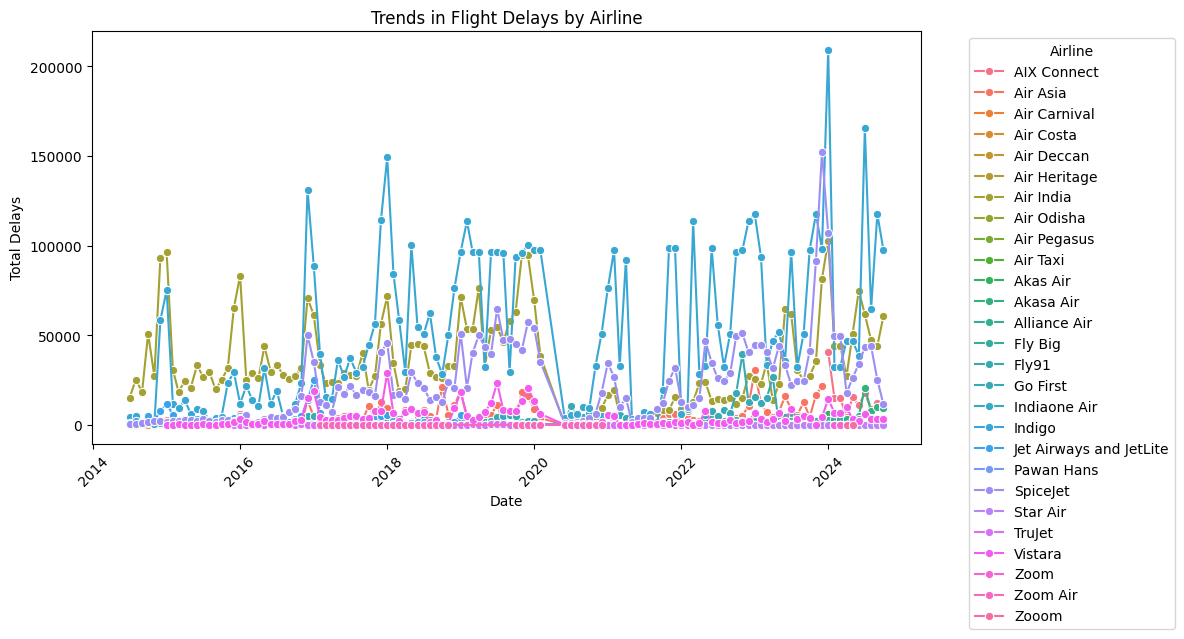

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing trends in delays
plt.figure(figsize=(12, 6))
sns.lineplot(data=delay_summary, x='Date', y='Total_Delays', hue='Airline', marker='o')
plt.title('Trends in Flight Delays by Airline')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Delays')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout for better fit
plt.show()


<ipython-input-13-dcc952573f41>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancellation_summary, x='Total_Cancellations', y='Airline', palette='viridis')


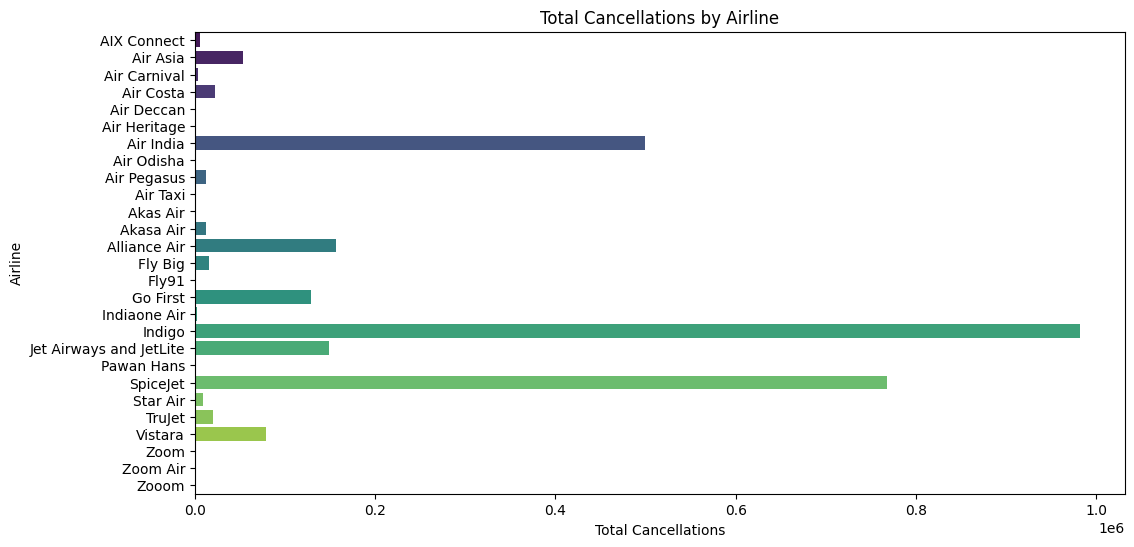

In [ ]:
# Visualizing cancellations
plt.figure(figsize=(12, 6))
sns.barplot(data=cancellation_summary, x='Total_Cancellations', y='Airline', palette='viridis')
plt.title('Total Cancellations by Airline')
plt.xlabel('Total Cancellations')
plt.ylabel('Airline')
plt.show()


<ipython-input-14-8ea0418b3861>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=boarding_summary, x='Total_Denied_Boardings', y='Airline', palette='magma')


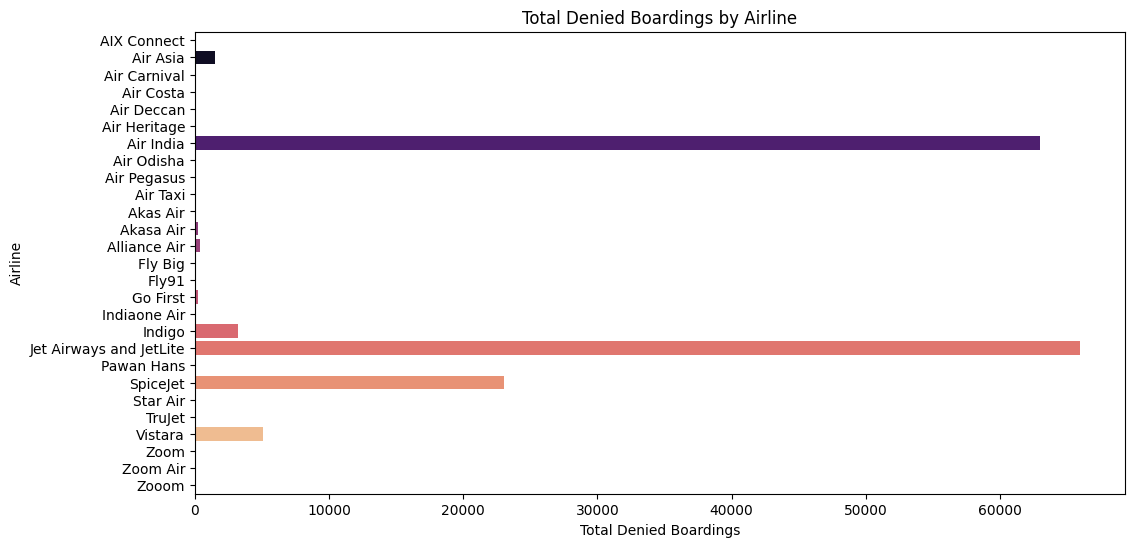

In [ ]:
# Visualizing denied boardings
plt.figure(figsize=(12, 6))
sns.barplot(data=boarding_summary, x='Total_Denied_Boardings', y='Airline', palette='magma')
plt.title('Total Denied Boardings by Airline')
plt.xlabel('Total Denied Boardings')
plt.ylabel('Airline')
plt.show()


Monthly Delay Summary:
    Month  Total_Delays  Average_Revenue_Loss
0       1     2268169.0             36.607500
1       2     1291686.0             18.323208
2       3      928599.0             19.822222
3       4      877184.0             20.679767
4       5      953154.0             24.753400
5       6     1046891.0             22.260800
6       7     1290141.0             23.666731
7       8      919790.0             18.849216
8       9      930902.0             21.029583
9      10     1191401.0             23.032963
10     11     1343419.6             20.495111
11     12     2072664.0             33.181961


<ipython-input-15-bfc3a4b6c5fb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_delays, x='Month', y='Total_Delays', palette='coolwarm')


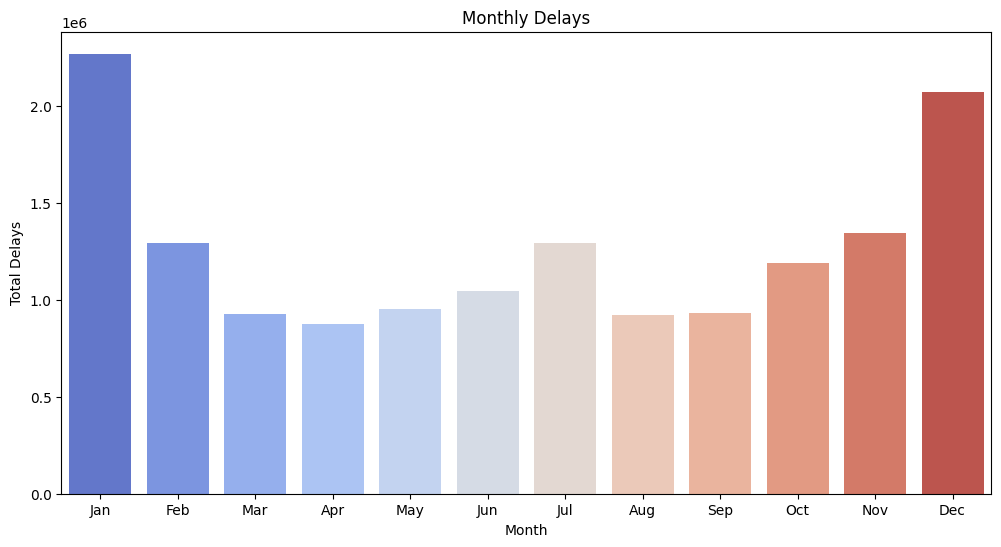

In [ ]:
# Extract month from the Date for monthly trends
df['Month'] = df['Date'].dt.month

# Monthly Delays
monthly_delays = delayed_flights.groupby(['Month']).agg(
    Total_Delays=('Count', 'sum'),
    Average_Revenue_Loss=('Revenue_Loss', 'mean')
).reset_index()

print("Monthly Delay Summary:")
print(monthly_delays)

# Plot Monthly Delays
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_delays, x='Month', y='Total_Delays', palette='coolwarm')
plt.title('Monthly Delays')
plt.xlabel('Month')
plt.ylabel('Total Delays')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()


In [ ]:
# Create a summary table with total incidents for each airline
performance_summary = df.groupby('Airline').agg(
    Total_Delays=('Count', lambda x: (x[df['Incident_Type'] == 'Delayed Beyond 2 Hours']).sum()),
    Total_Cancellations=('Count', lambda x: (x[df['Incident_Type'] == 'Cancellations']).sum()),
    Total_Denied_Boardings=('Count', lambda x: (x[df['Incident_Type'] == 'Denied Boarding']).sum()),
    Total_Revenue_Loss=('Revenue_Loss', 'sum')
).reset_index()

print("Airline Performance Summary:")
print(performance_summary.sort_values(by='Total_Delays', ascending=False))


Airline Performance Summary:
                    Airline  Total_Delays  Total_Cancellations  \
17                   Indigo     6238122.0             982311.0   
6                 Air India     4081696.0             499246.0   
20                 SpiceJet     2837414.0             767466.0   
1                  Air Asia      524193.0              53258.0   
23                  Vistara      482980.6              78577.0   
15                 Go First      369688.0             129197.0   
18  Jet Airways and JetLite      189580.0             149196.0   
0               AIX Connect      140235.0               6092.0   
11                Akasa Air       95438.0              12729.0   
12             Alliance Air       87406.0             156494.0   
13                  Fly Big       19993.0              15827.0   
3                 Air Costa       17974.0              22785.0   
10                 Akas Air       14877.0               1422.0   
22                   TruJet        7007.0      

<ipython-input-18-84c3a4bf0861>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_summary['Airline'] = combined_summary['Airline'].astype('category').cat.codes


Correlation Matrix:
                         Airline  Total_Delays  Total_Cancellations  \
Airline                 1.000000      0.046891             0.131268   
Total_Delays            0.046891      1.000000             0.949286   
Total_Cancellations     0.131268      0.949286             1.000000   
Total_Denied_Boardings  0.026604      0.401874             0.405543   

                        Total_Denied_Boardings  
Airline                               0.026604  
Total_Delays                          0.401874  
Total_Cancellations                   0.405543  
Total_Denied_Boardings                1.000000  


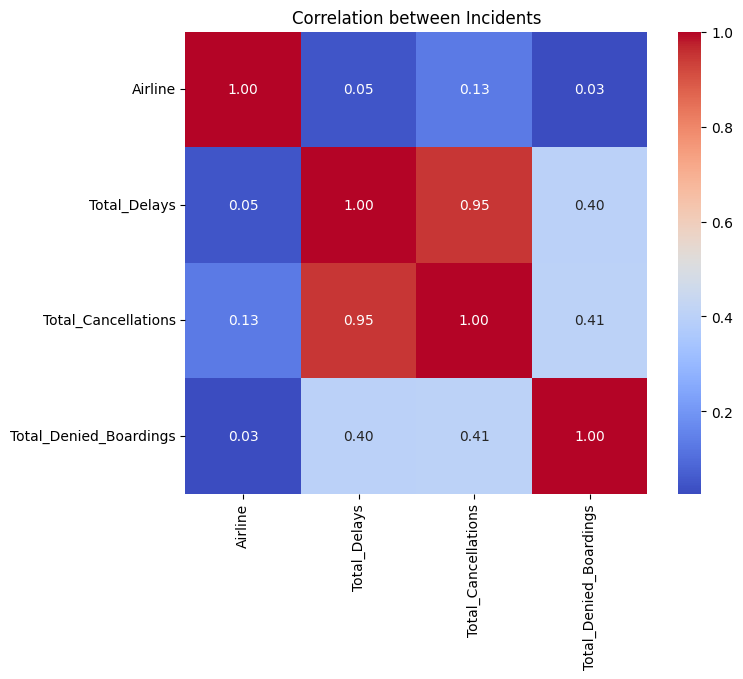

In [ ]:
# Merging the summaries to see correlations
combined_summary = performance_summary[['Airline', 'Total_Delays', 'Total_Cancellations', 'Total_Denied_Boardings']]

# Convert 'Airline' to a categorical data type with numerical encoding before correlation
combined_summary['Airline'] = combined_summary['Airline'].astype('category').cat.codes

correlation_matrix = combined_summary.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation between Incidents')
plt.show()

In [ ]:
# Calculate total revenue losses from all incidents
total_revenue_loss = df['Revenue_Loss'].sum()
print(f"Total Revenue Loss Due to Delays, Cancellations, and Denied Boardings: ${total_revenue_loss:.2f}")


Total Revenue Loss Due to Delays, Cancellations, and Denied Boardings: $31012.59


Incident Type Breakdown:
                        Total_Incidents                                       
Incident_Type             Cancellations Delayed Beyond 2 Hours Denied Boarding
Airline                                                                       
AIX Connect                      6092.0               140235.0             0.0
Air Asia                        53258.0               524193.0          1480.0
Air Carnival                     3288.0                   95.0             0.0
Air Costa                       22785.0                17974.0             1.0
Air Deccan                        980.0                  157.0             6.0
Air Heritage                      291.0                  208.0            33.0
Air India                      499246.0              4081696.0         62967.0
Air Odisha                        422.0                   34.0             0.0
Air Pegasus                     12785.0                 4318.0             0.0
Air Taxi                   

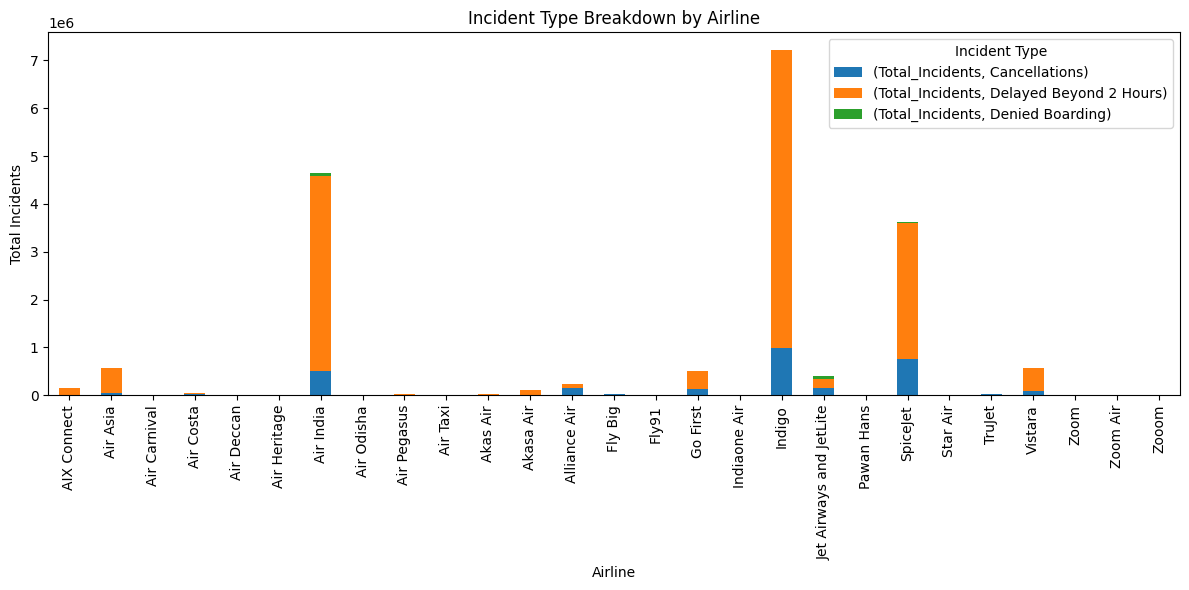

In [ ]:
# Count incidents by type for each airline
incident_summary = df.groupby(['Airline', 'Incident_Type']).agg(
    Total_Incidents=('Count', 'sum')
).unstack(fill_value=0)

print("Incident Type Breakdown:")
print(incident_summary)

# Plotting the breakdown of incident types for each airline
incident_summary.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Incident Type Breakdown by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Incidents')
plt.legend(title='Incident Type')
plt.tight_layout()
plt.show()


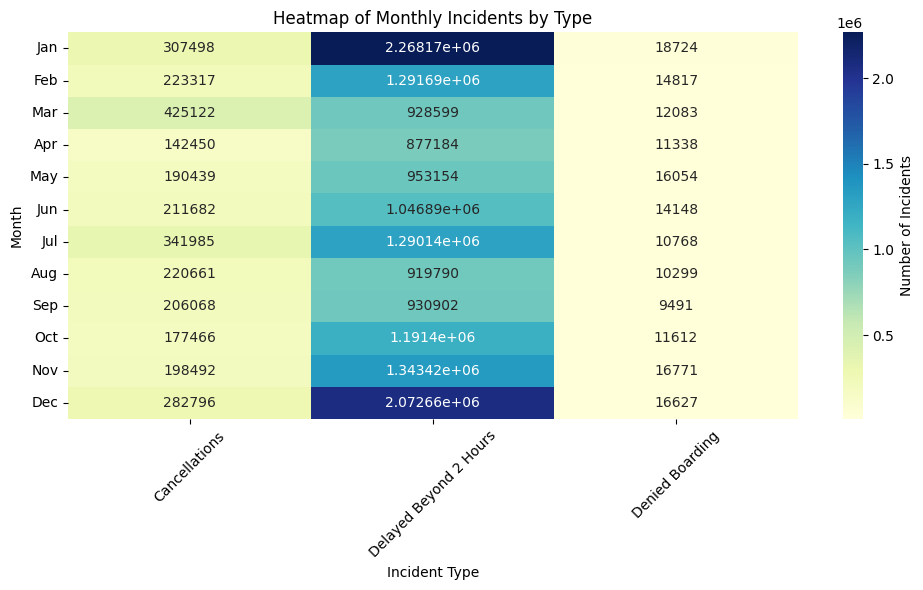

In [ ]:
# Creating a summary DataFrame for the heatmap
monthly_summary = df.pivot_table(index='Month', columns='Incident_Type', values='Count', aggfunc='sum', fill_value=0)

# Plotting the heatmap for incidents
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_summary, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Number of Incidents'})
plt.title('Heatmap of Monthly Incidents by Type')
plt.xlabel('Incident Type')
plt.ylabel('Month')
plt.xticks(ticks=[0.5 + i for i in range(len(monthly_summary.columns))], labels=monthly_summary.columns, rotation=45)
plt.yticks(ticks=[0.5 + i for i in range(len(monthly_summary.index))], labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-22-08a8fb6a2c47>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=revenue_plot_data, x='Incident_Type', y='Revenue_Loss', palette='Set2')


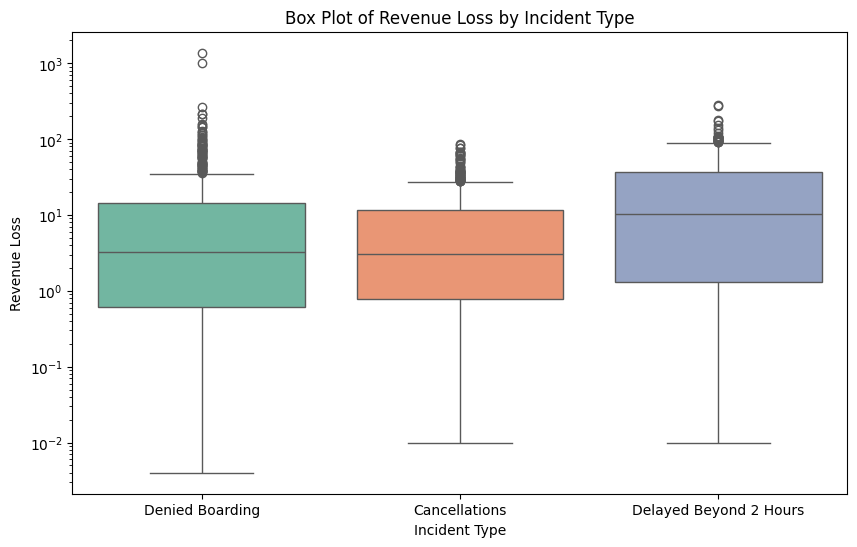

In [ ]:
# Combining the necessary data
revenue_plot_data = df[['Incident_Type', 'Revenue_Loss']].copy()

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=revenue_plot_data, x='Incident_Type', y='Revenue_Loss', palette='Set2')
plt.title('Box Plot of Revenue Loss by Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Revenue Loss')
plt.yscale('log')  # Use log scale if there are a few outliers
plt.show()


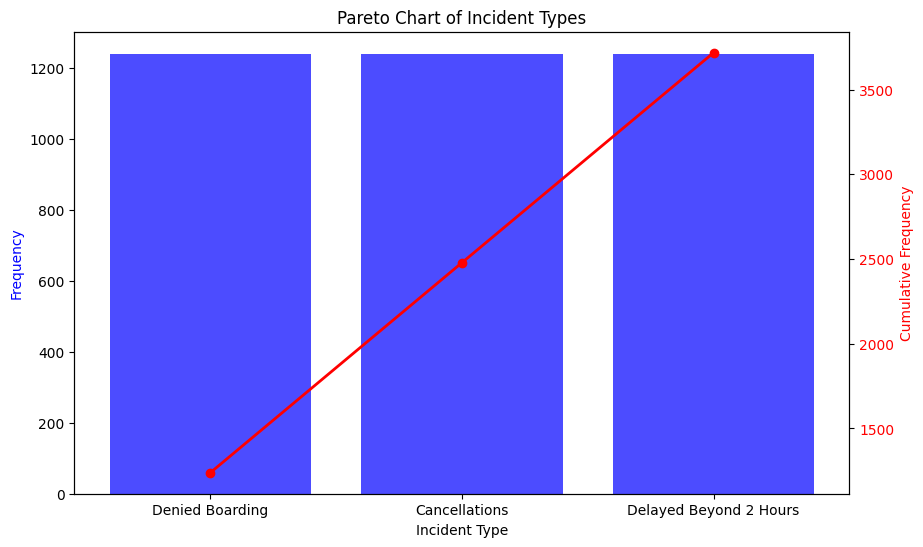

In [ ]:
# Aggregating incident counts
incident_counts = df['Incident_Type'].value_counts()
cumulative_counts = incident_counts.cumsum()

# Creating a Pareto chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(incident_counts.index, incident_counts.values, color='blue', alpha=0.7)
ax.set_ylabel('Frequency', color='blue')
ax.set_xlabel('Incident Type')
ax.set_title('Pareto Chart of Incident Types')

# Adding a secondary axis for the cumulative sum
ax2 = ax.twinx()
ax2.plot(incident_counts.index, cumulative_counts, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Frequency', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()


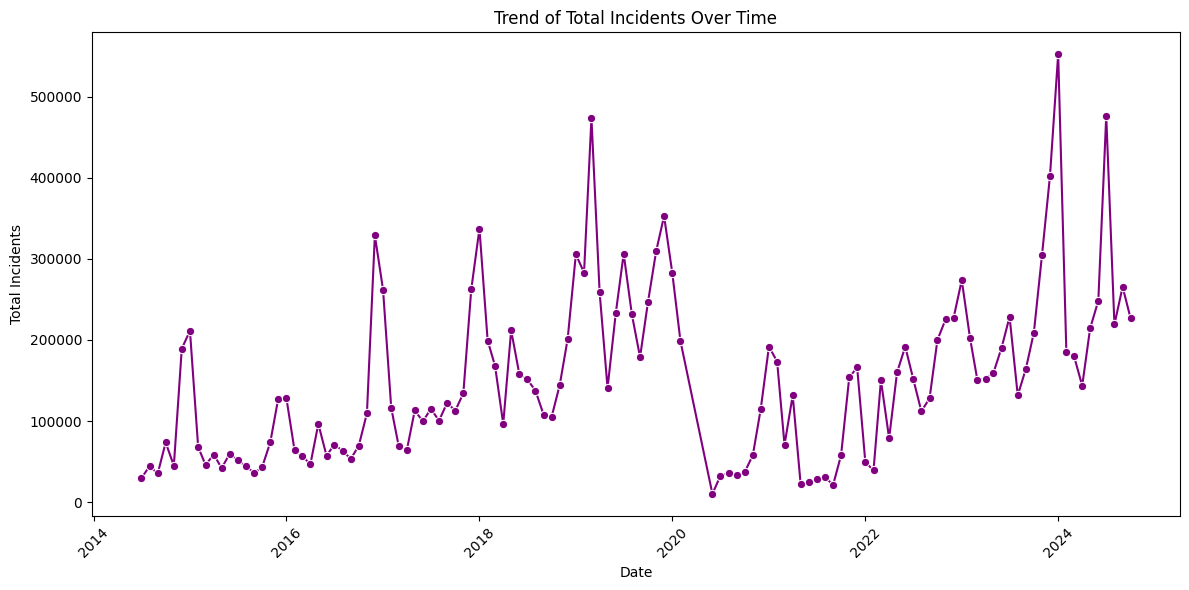

In [ ]:
# Get total incidents over time
total_incidents_over_time = df.groupby('Date').agg(Total_Incidents=('Count', 'sum')).reset_index()

# Plotting the trend of total incidents over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_incidents_over_time, x='Date', y='Total_Incidents', marker='o', color='purple')
plt.title('Trend of Total Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Total Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


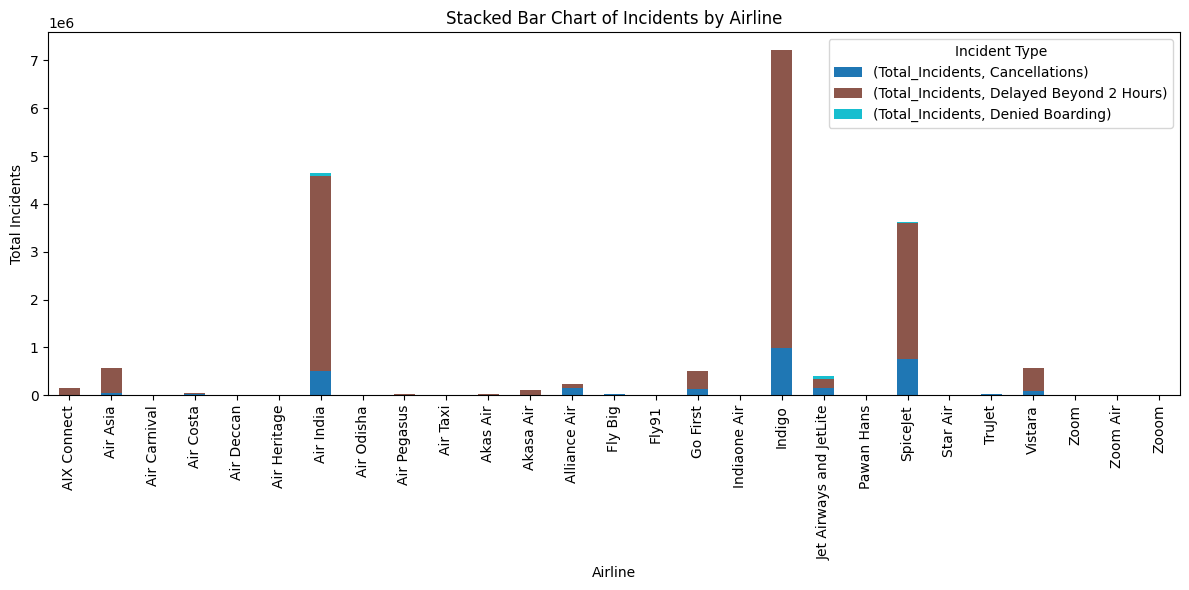

In [ ]:
# Create a stacked bar chart for incidents by airline
incident_summary_stacked = df.groupby(['Airline', 'Incident_Type']).agg(Total_Incidents=('Count', 'sum')).unstack(fill_value=0)

# Plotting
incident_summary_stacked.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Stacked Bar Chart of Incidents by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Incidents')
plt.legend(title='Incident Type')
plt.tight_layout()
plt.show()


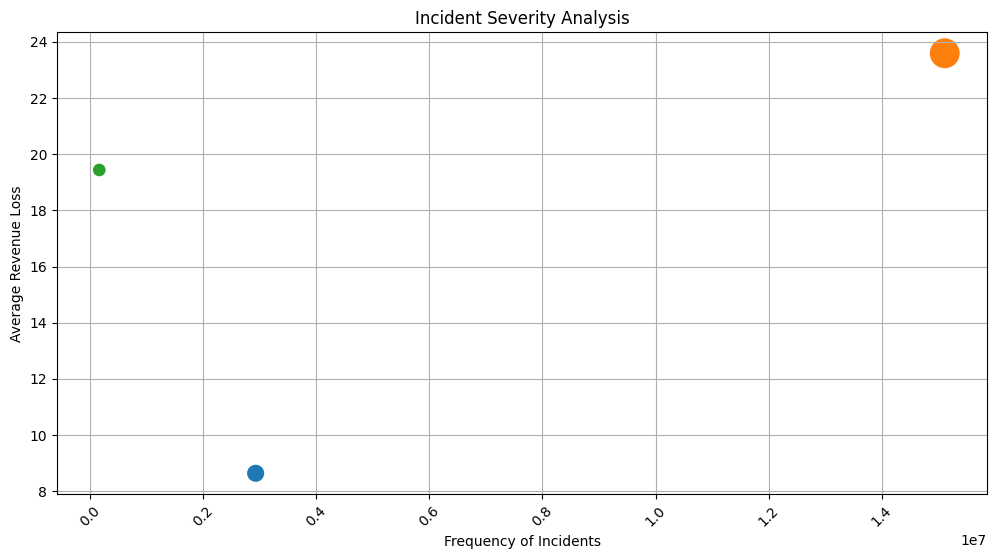

In [ ]:
# Create a severity score for incidents
severity_scores = df.groupby('Incident_Type').agg(
    Frequency=('Count', 'sum'),
    Average_Revenue_Loss=('Revenue_Loss', 'mean')
).reset_index()

# Plotting severity analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=severity_scores, x='Frequency', y='Average_Revenue_Loss', size='Frequency', sizes=(100, 500), hue='Incident_Type', legend=False)
plt.title('Incident Severity Analysis')
plt.xlabel('Frequency of Incidents')
plt.ylabel('Average Revenue Loss')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


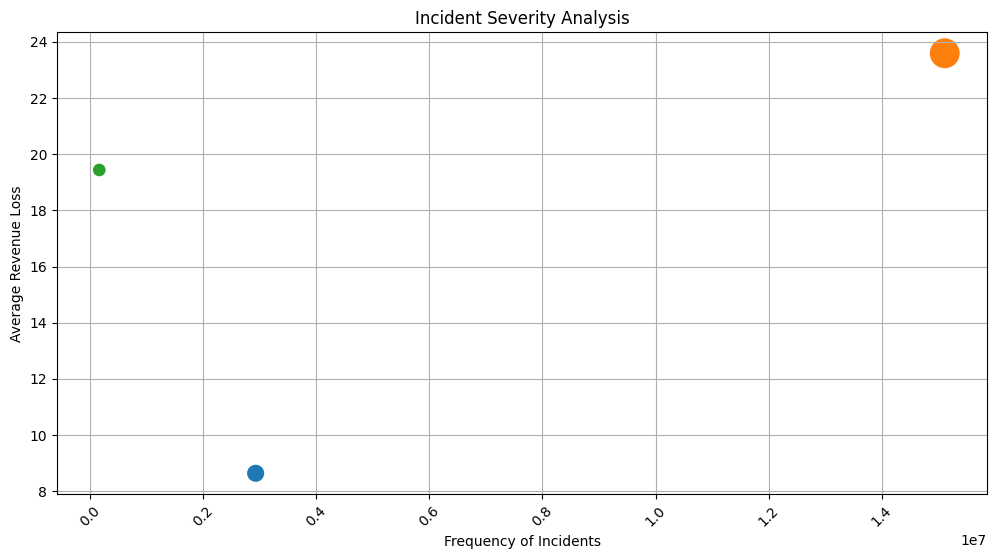

In [ ]:
# Create a severity score for incidents
severity_scores = df.groupby('Incident_Type').agg(
    Frequency=('Count', 'sum'),
    Average_Revenue_Loss=('Revenue_Loss', 'mean')
).reset_index()

# Plotting severity analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=severity_scores, x='Frequency', y='Average_Revenue_Loss', size='Frequency', sizes=(100, 500), hue='Incident_Type', legend=False)
plt.title('Incident Severity Analysis')
plt.xlabel('Frequency of Incidents')
plt.ylabel('Average Revenue Loss')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-28-050f0d8f83e1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=performance_summary, x='Total_Delays', y='Airline', palette='rocket')
<ipython-input-28-050f0d8f83e1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=performance_summary, x='Total_Cancellations', y='Airline', palette='Set2')


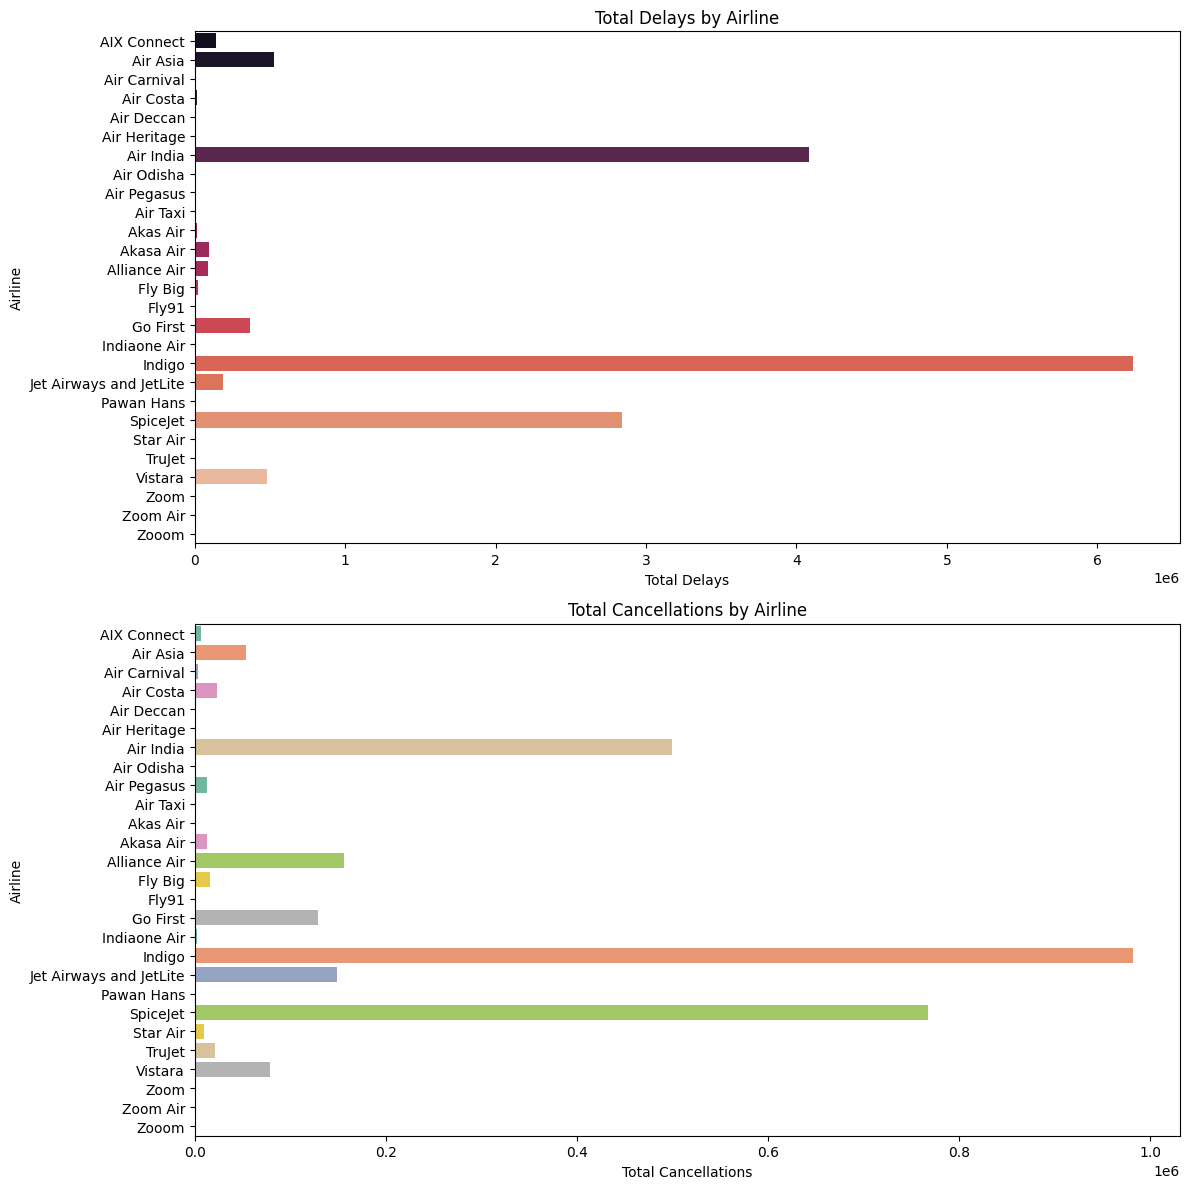

In [ ]:
# Prepare subplot figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Total Delays Bar Plot
sns.barplot(ax=axes[0], data=performance_summary, x='Total_Delays', y='Airline', palette='rocket')
axes[0].set_title('Total Delays by Airline')
axes[0].set_xlabel('Total Delays')

# Total Cancellations Bar Plot
sns.barplot(ax=axes[1], data=performance_summary, x='Total_Cancellations', y='Airline', palette='Set2')
axes[1].set_title('Total Cancellations by Airline')
axes[1].set_xlabel('Total Cancellations')

plt.tight_layout()
plt.show()

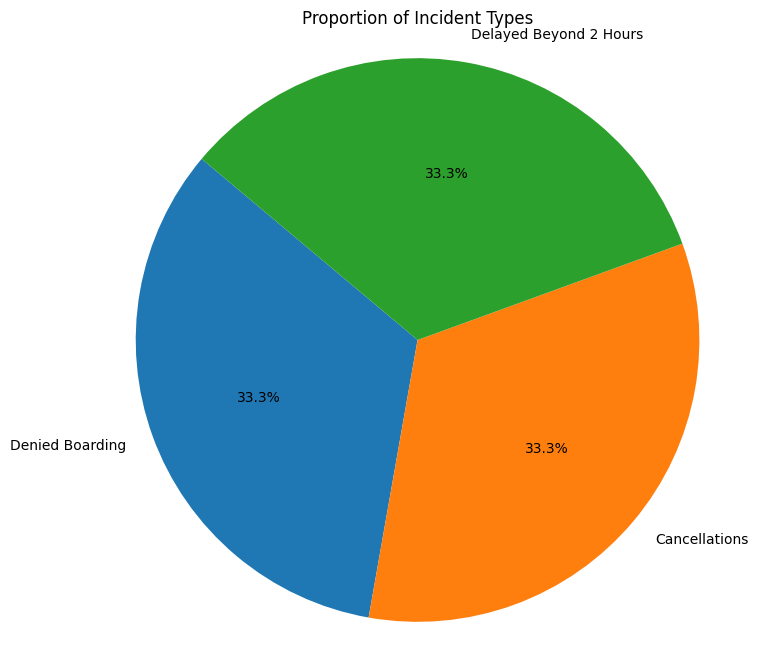

In [ ]:
# Incident type proportions
incident_counts = df['Incident_Type'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(incident_counts, labels=incident_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Incident Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
plt.show()

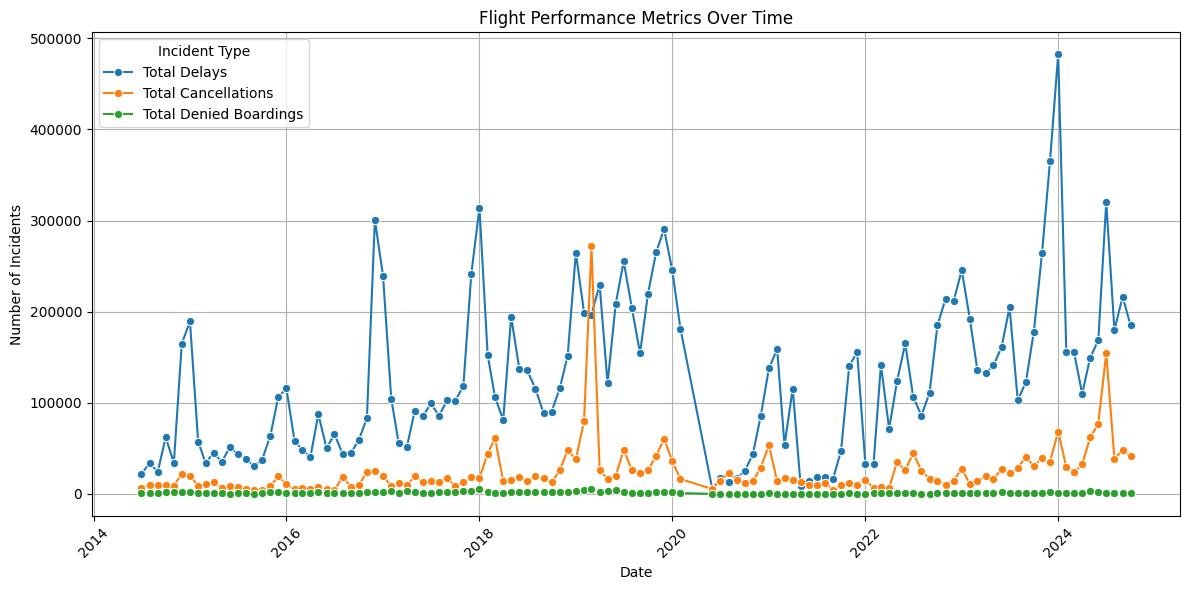

In [ ]:
# Prepare a DataFrame for performance metrics over time
performance_over_time = df.groupby(['Date']).agg(
    Total_Delays=('Count', lambda x: (x[df['Incident_Type'] == 'Delayed Beyond 2 Hours']).sum()),
    Total_Cancellations=('Count', lambda x: (x[df['Incident_Type'] == 'Cancellations']).sum()),
    Total_Denied_Boardings=('Count', lambda x: (x[df['Incident_Type'] == 'Denied Boarding']).sum())
).reset_index()

# Plotting performance metrics
plt.figure(figsize=(12, 6))
sns.lineplot(data=performance_over_time, x='Date', y='Total_Delays', label='Total Delays', marker='o')
sns.lineplot(data=performance_over_time, x='Date', y='Total_Cancellations', label='Total Cancellations', marker='o')
sns.lineplot(data=performance_over_time, x='Date', y='Total_Denied_Boardings', label='Total Denied Boardings', marker='o')
plt.title('Flight Performance Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Incident Type')
plt.grid(True)
plt.tight_layout()
plt.show()